<a href="https://colab.research.google.com/github/kivvgsr/CODSOFT/blob/main/MOVIE_RATING_PREDICTION_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MOVIE RATING PREDICTION WITH PYTHON**
* Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
* The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
* Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

In [291]:
#https://drive.google.com/file/d/1vGZBNMW4GCLG7r11EEPAqX4wpvBDef5C/view?usp=sharing
file_id = "1vGZBNMW4GCLG7r11EEPAqX4wpvBDef5C"
url = f"https://drive.google.com/uc?id={file_id}"

# Define the local file path where you want to save the dataset
output_path = "/content/dataset.csv"

# Download the dataset using gdown
import gdown
gdown.download(url, output_path, quiet=False)
encoding = "ISO-8859-1"

# Now you can read the dataset using pandas or any other relevant library
import pandas as pd
df = pd.read_csv(output_path,encoding=encoding)

Downloading...
From: https://drive.google.com/uc?id=1vGZBNMW4GCLG7r11EEPAqX4wpvBDef5C
To: /content/dataset.csv
100%|██████████| 1.38M/1.38M [00:00<00:00, 153MB/s]


In [292]:
import warnings
warnings.filterwarnings('ignore')


### Lets use .head() method to c the first five rows of the data

In [293]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [294]:
rows, columns = df.shape

print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 15509
Number of columns: 10


In [295]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [296]:
import numpy as np
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


###The output will show you the data type of each column, the number of non-null values, and the memory usage. This is useful for understanding the structure of your DataFrame and identifying any missing values.

##**Lets find how many null values are there totally**

In [297]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [298]:
import pandas as pd

# Assuming df is your DataFrame
rows, columns = df.shape

print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')


Number of rows: 15509
Number of columns: 10


### Totally we have 15509 rows and 10 columns

In [299]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


### this will give the statistical report of the dataset

##**Handling Missing Values:**


In [300]:
df.drop_duplicates(inplace=True)

### This will drop the duplicate values present in the data set

In [301]:
x1 = ['Name', 'Year', 'Duration', 'Votes','Rating']
df.dropna(subset = x1 , inplace =True)


In [302]:
df.isnull().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

##Distribution of Ratings:

Create a histogram or a kernel density plot to visualize the distribution of movie ratings.

You can use seaborn or matplotlib for this:

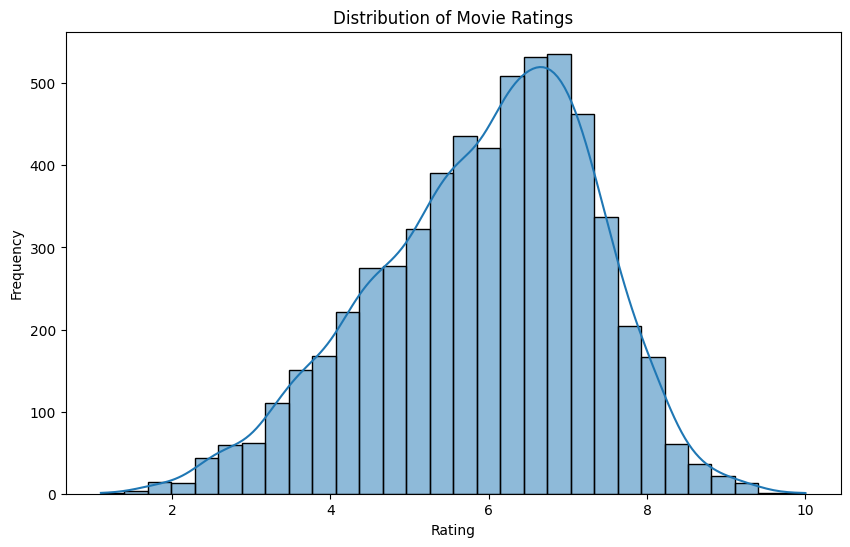

In [303]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


##Director-wise Rating:

Investigate the average ratings of movies for each director.

This requires grouping the data and creating a bar chart

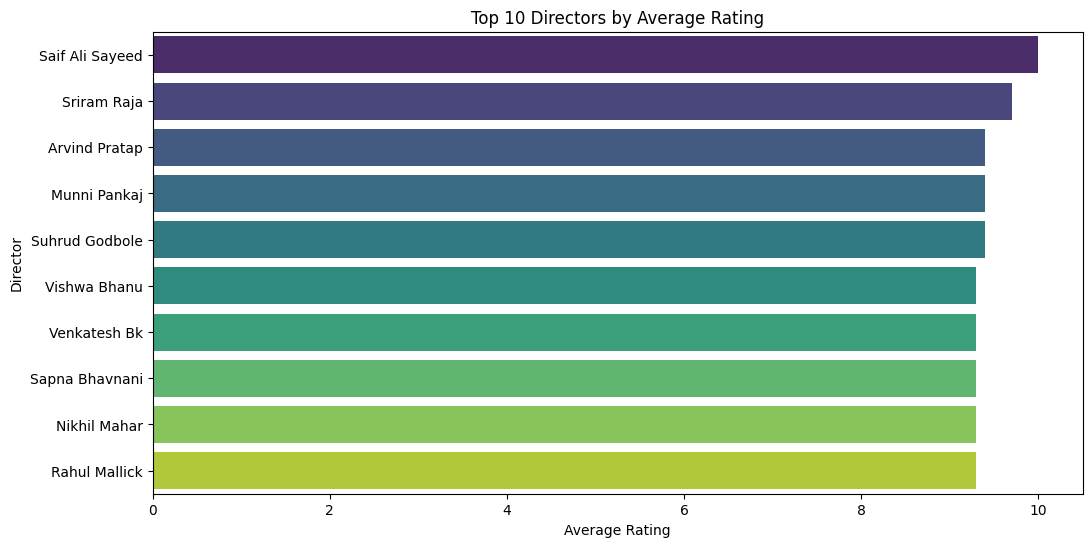

In [304]:
director_ratings = df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=director_ratings.values, y=director_ratings.index, palette='viridis')
plt.title('Top 10 Directors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()


## This will give top 20 highest rated movies

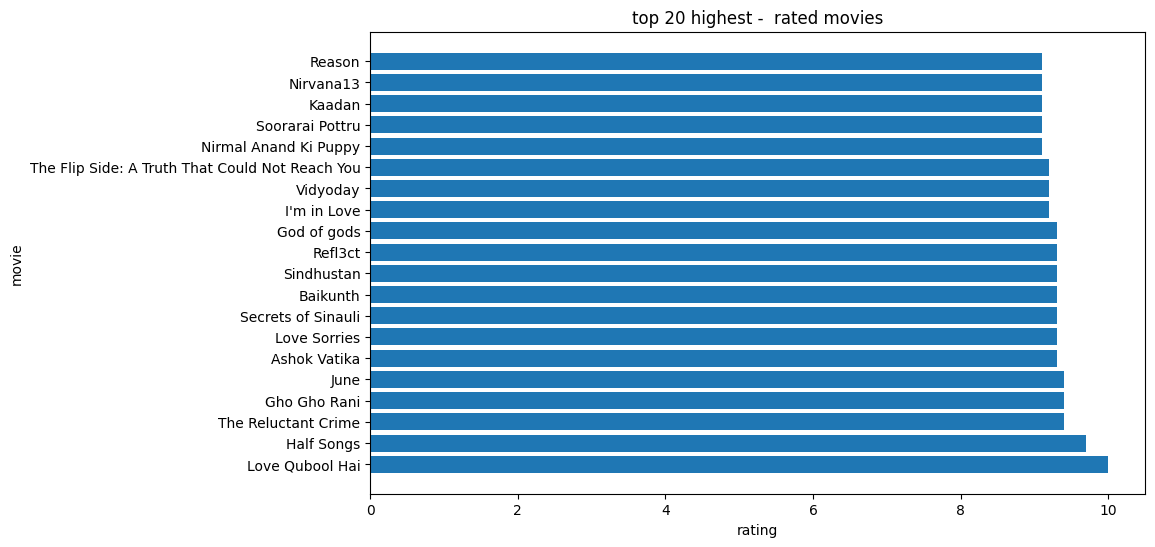

In [305]:
df1 = df.sort_values(by ='Rating',ascending = False).head(20)
plt.figure(figsize = (10,6))
plt.barh(df1['Name'],df1['Rating'])
plt.xlabel("rating")
plt.ylabel("movie")
plt.title("top 20 highest -  rated movies")
plt.show()

##**This will limit the display to the top 10 genres based on their counts.**

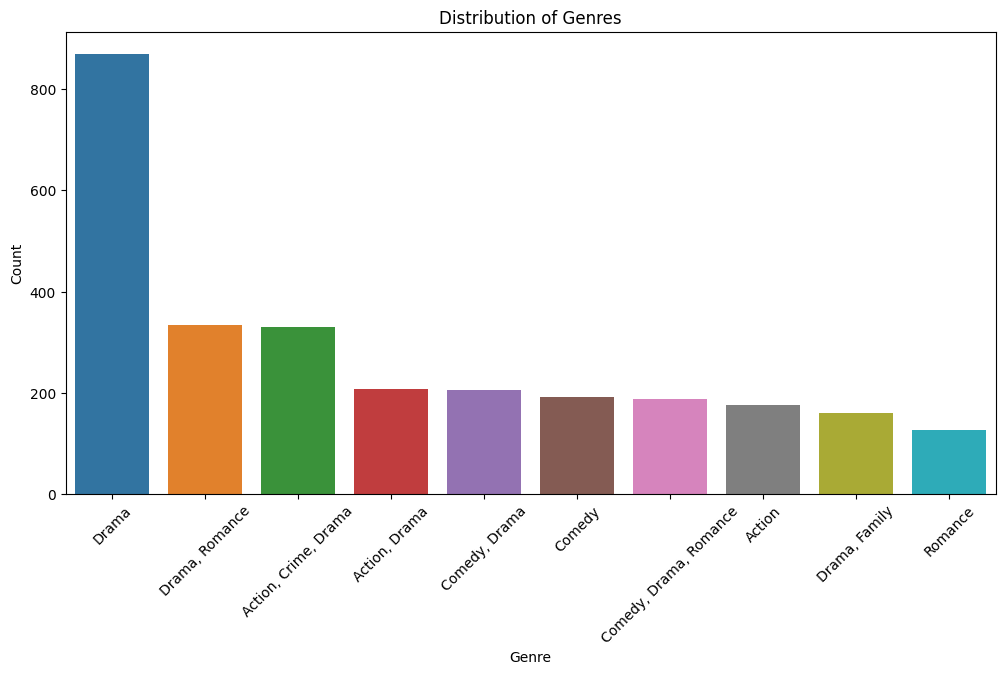

In [306]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index[:10])
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



### Distribution of Top 10 Highest-Rated Genres

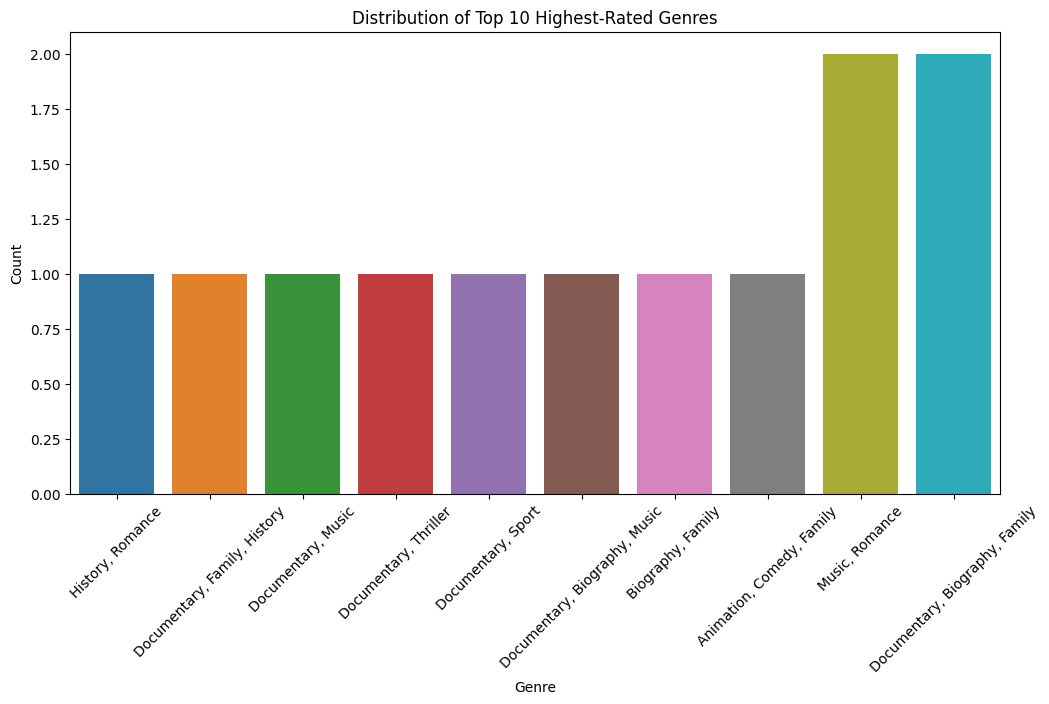

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns


top_genres = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False).head(10).index

# Filter the DataFrame for the top genres
df_top_genres = df[df['Genre'].isin(top_genres)]

# Plot the countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=df_top_genres, order=top_genres)
plt.title('Distribution of Top 10 Highest-Rated Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## This will give the top 10 actors based in no of movies performed

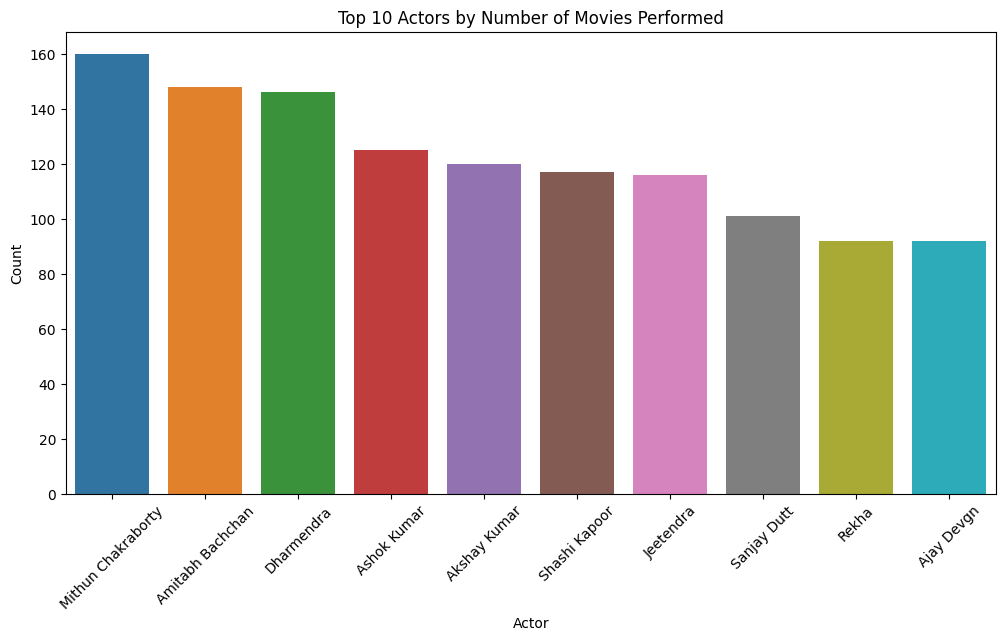

In [308]:



# Combine all actor columns into a single column
all_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']], ignore_index=True)

# Get the top 10 actors based on the number of movies performed
top_actors = all_actors.value_counts().head(10).index

# Filter the DataFrame for the top actors
df_top_actors = df[df[['Actor 1', 'Actor 2', 'Actor 3']].isin(top_actors).any(axis=1)]

# Plot the countplot
plt.figure(figsize=(12, 6))
sns.countplot(x=all_actors, data=df_top_actors, order=top_actors)
plt.title('Top 10 Actors by Number of Movies Performed')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [309]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [310]:

df = df.dropna(subset = ['Votes'])
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


##**Model Training and Testing**

In [311]:
# Convert 'Year' and 'Duration' columns to strings
df['Year'] = df['Year'].astype('str')
df['Duration'] = df['Duration'].astype('str')

# Extract numeric values from 'Year' and 'Duration', and convert to float
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

# Remove commas from 'Votes' and convert to numeric
df['Votes'] = df['Votes'].str.replace(',', '')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Create a DataFrame 'x' with columns 'Year', 'Duration', and 'Votes'
x = df[['Year', 'Duration', 'Votes']]

# Create a DataFrame 'y' with the 'Rating' column
y = df['Rating']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split


In [312]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)


In [320]:

from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



In [324]:
model_params = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['friedman_mse', 'poisson', 'absolute_error', 'squared_error']
        }
    }
}


In [325]:
scores = []
from sklearn.model_selection import GridSearchCV
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

model_selection_results = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(model_selection_results)


               model  best_score                      best_params
0  linear_regression    0.038152                               {}
1      random_forest    0.119577             {'n_estimators': 10}
2      decision_tree   -0.431096  {'criterion': 'absolute_error'}
